In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer , PowerTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder,OrdinalEncoder
from sklearn.metrics import DistanceMetric
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')


In [2]:
data=pd.read_csv(r"C:\Users\LENOVO\Downloads\CarPrice_Assignment.csv")

In [3]:
pd.set_option("display.max_column",100)

In [4]:
data1=data.copy()

In [5]:
data1.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
data1.shape

(205, 26)

In [7]:
for col in data1.columns:
    print(col)
    print(data1[col].unique())

car_ID
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205]
symboling
[ 3  1  2  0 -1 -2]
CarName
['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 

In [8]:
for col in data1.columns:
    print(data1[col].value_counts())

1      1
142    1
132    1
133    1
134    1
      ..
72     1
73     1
74     1
75     1
205    1
Name: car_ID, Length: 205, dtype: int64
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64
gas       185
diesel     20
Name: fueltype, dtype: int64
std      168
turbo     37
Name: aspiration, dtype: int64
four    115
two      90
Name: doornumber, dtype: int64
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
front    202
rear       3
Name: enginelocation, dtype: int64
94.5     21
93.7     20
95.7     13
96

In [9]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [10]:
data1=data1.drop(columns=["car_ID","CarName"],axis=1)

In [11]:
data1

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [12]:
data1["symboling"]=data1["symboling"].astype("category")
data1["cylindernumber"]=data1["cylindernumber"].astype("category")
data1["doornumber"]=data1["doornumber"].astype("category")

In [13]:
fv=data1.iloc[:,:-1]
cv=data1.iloc[:,-1]

In [14]:
x_train,x_test,y_train,y_test=train_test_split(fv,cv,test_size=0.2)

In [15]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 50 to 191
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   symboling         164 non-null    category
 1   fueltype          164 non-null    object  
 2   aspiration        164 non-null    object  
 3   doornumber        164 non-null    category
 4   carbody           164 non-null    object  
 5   drivewheel        164 non-null    object  
 6   enginelocation    164 non-null    object  
 7   wheelbase         164 non-null    float64 
 8   carlength         164 non-null    float64 
 9   carwidth          164 non-null    float64 
 10  carheight         164 non-null    float64 
 11  curbweight        164 non-null    int64   
 12  enginetype        164 non-null    object  
 13  cylindernumber    164 non-null    category
 14  enginesize        164 non-null    int64   
 15  fuelsystem        164 non-null    object  
 16  boreratio         164 non

symboling


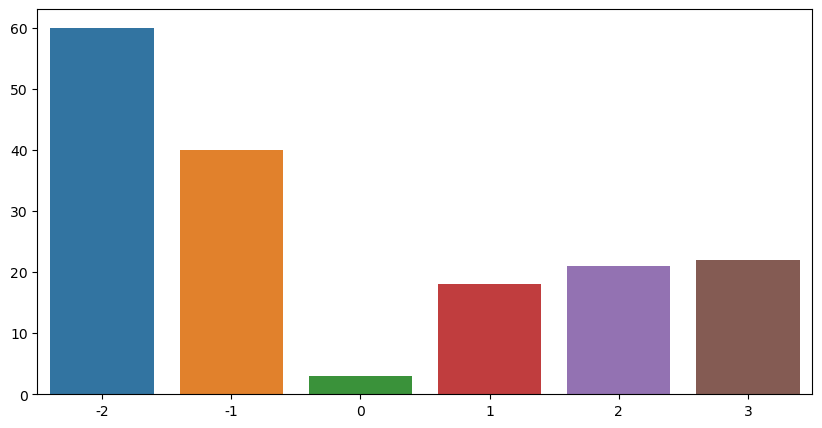

fueltype


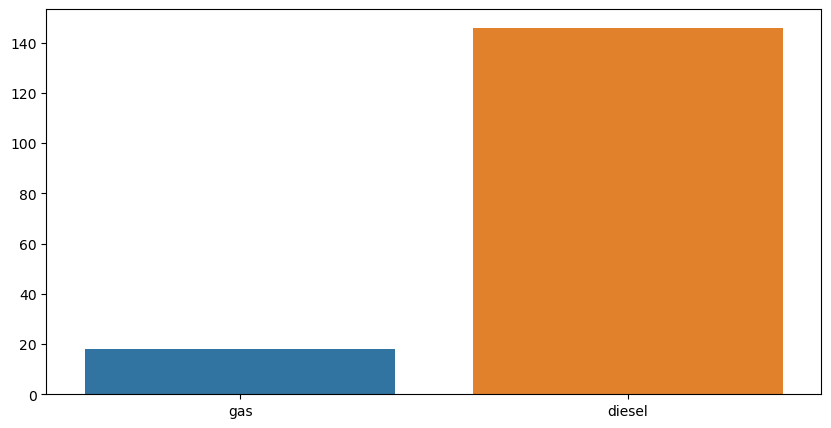

aspiration


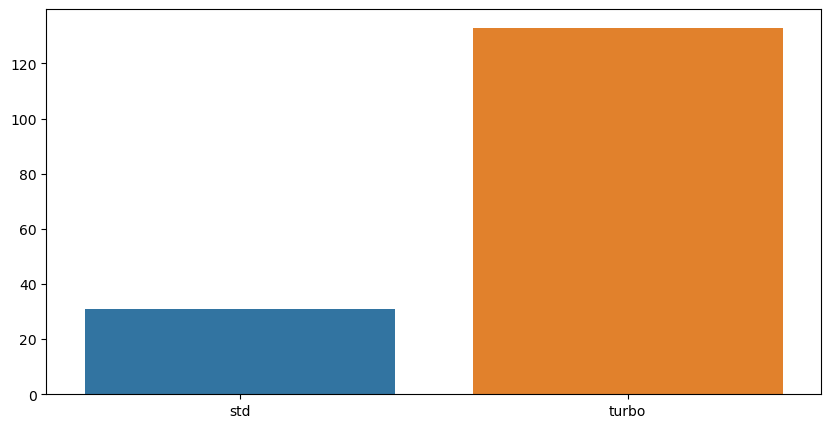

doornumber


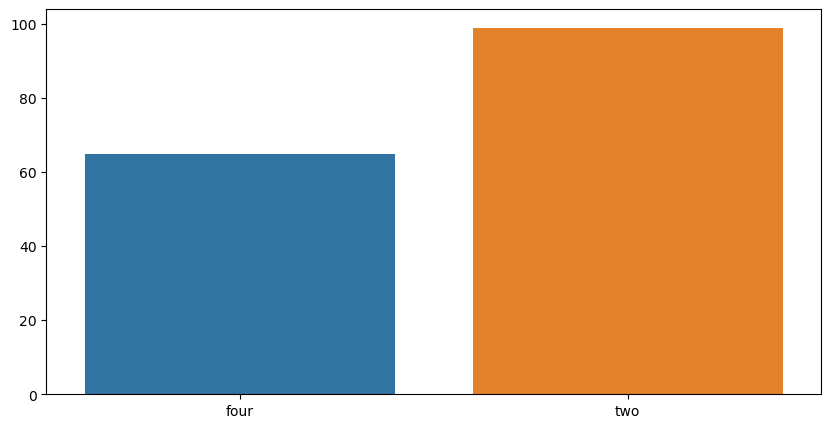

carbody


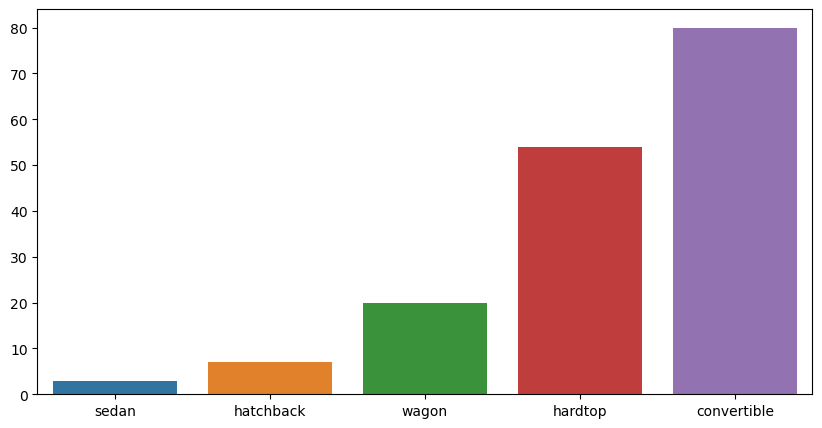

drivewheel


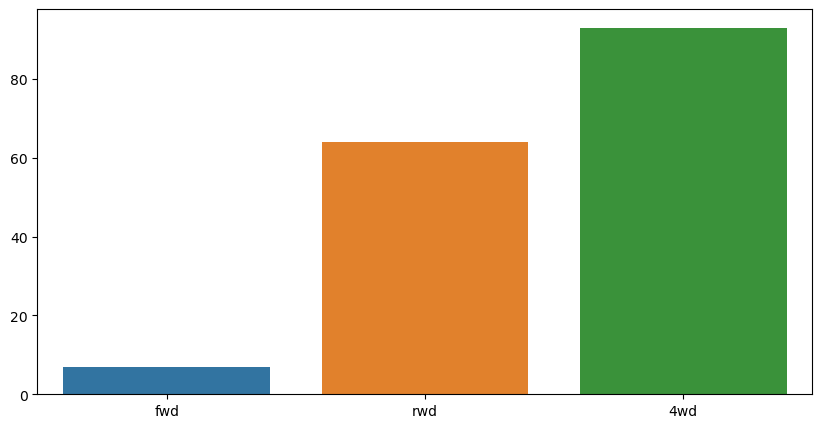

enginelocation


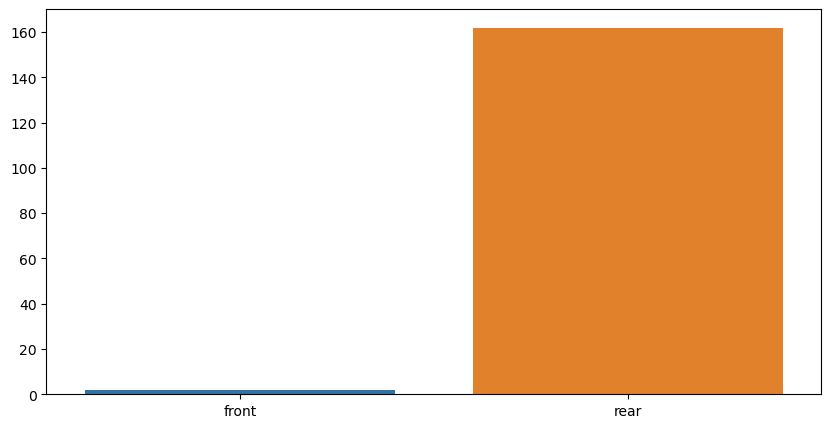

wheelbase


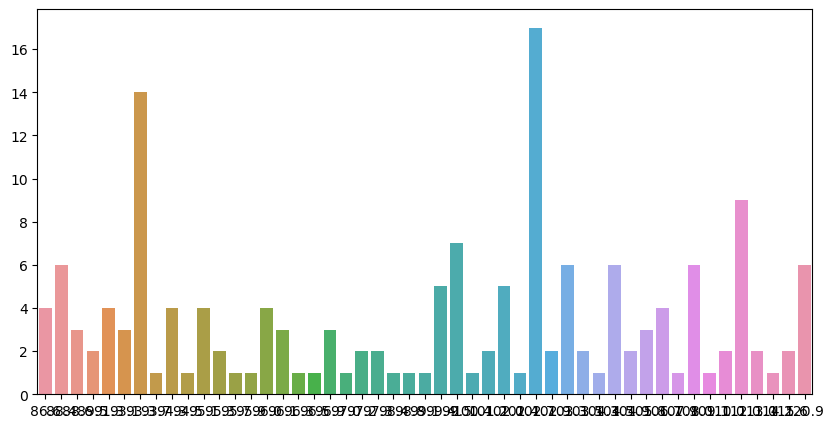

carlength


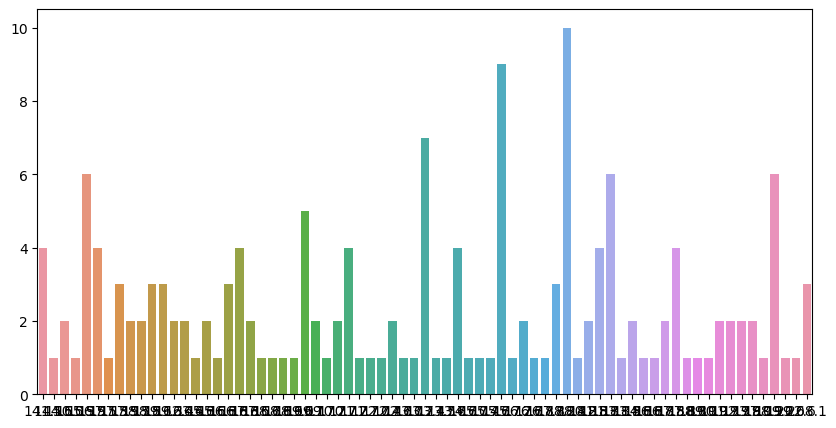

carwidth


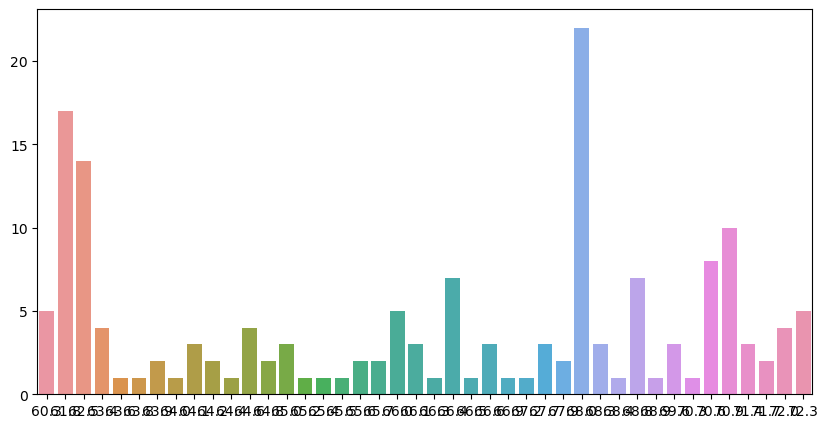

carheight


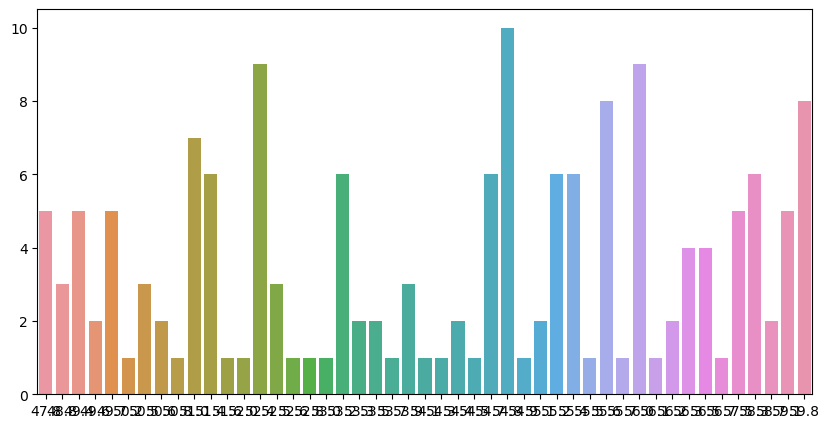

curbweight


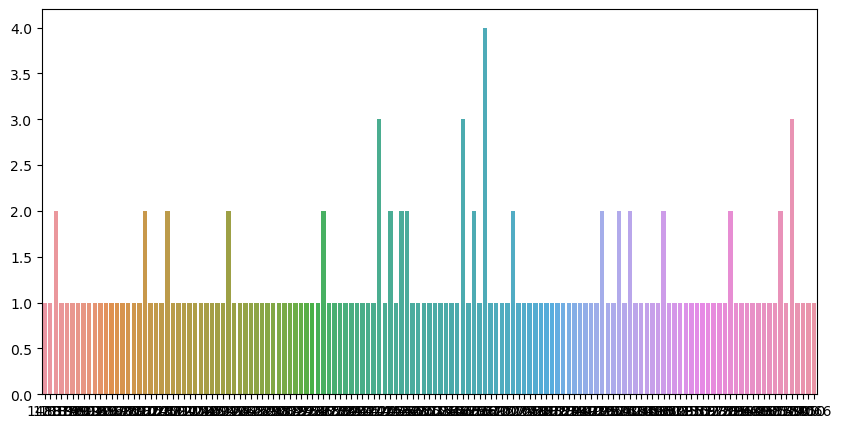

enginetype


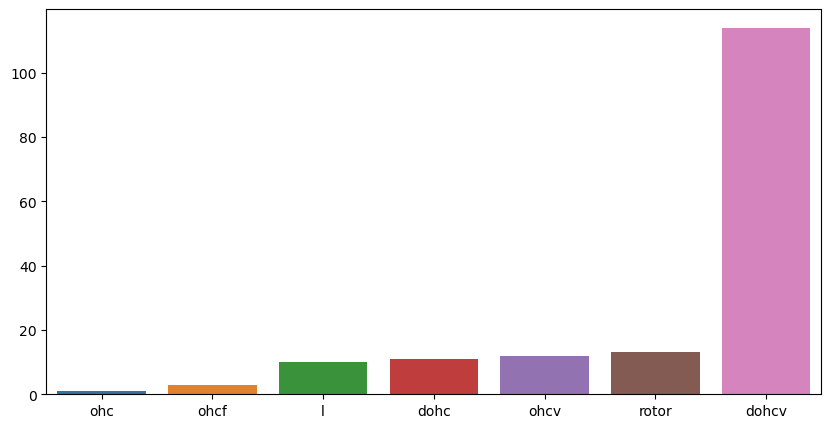

cylindernumber


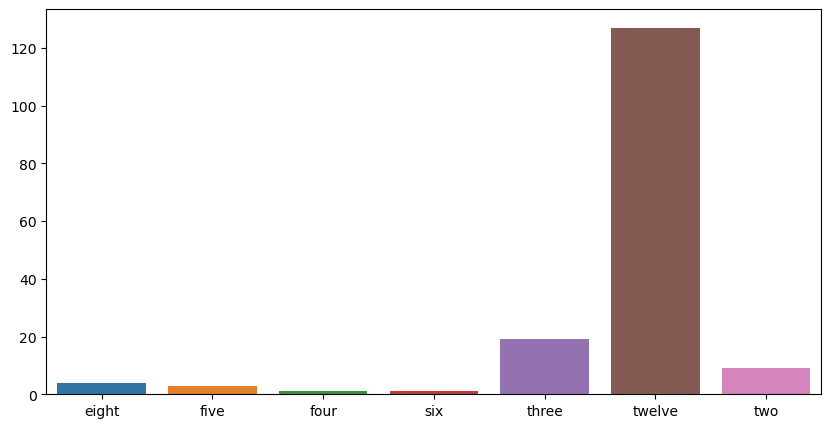

enginesize


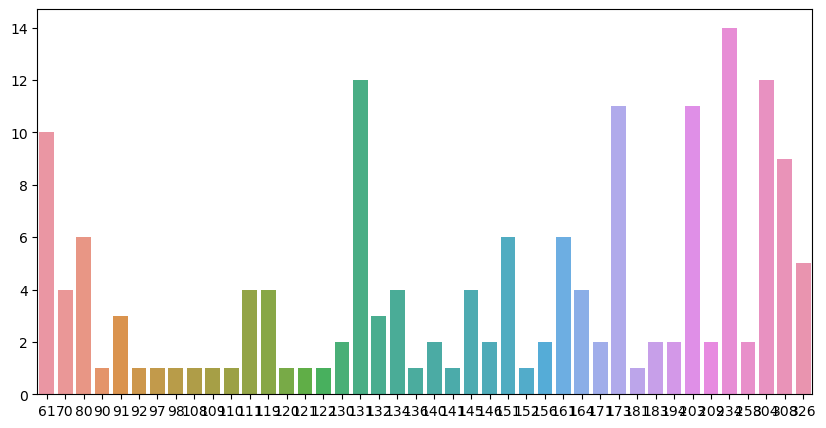

fuelsystem


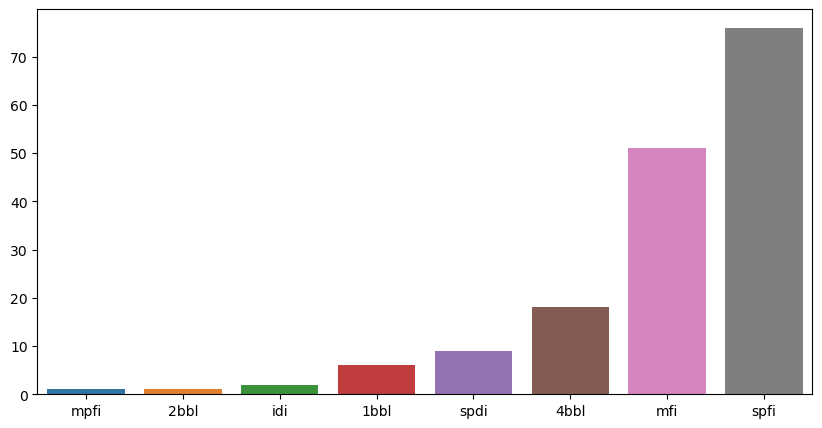

boreratio


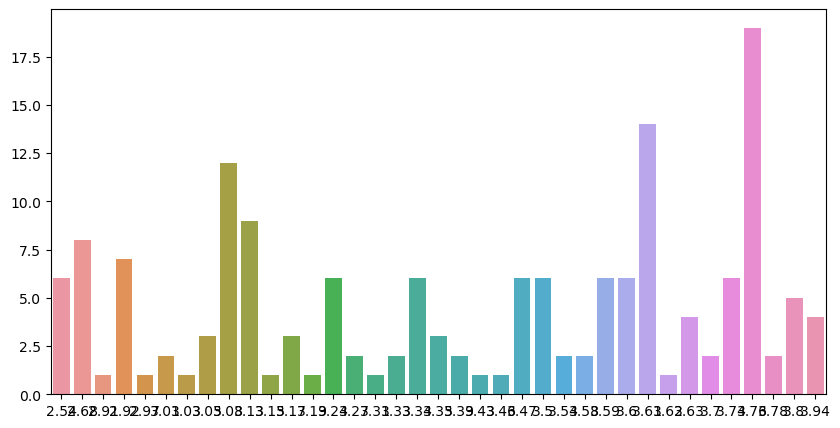

stroke


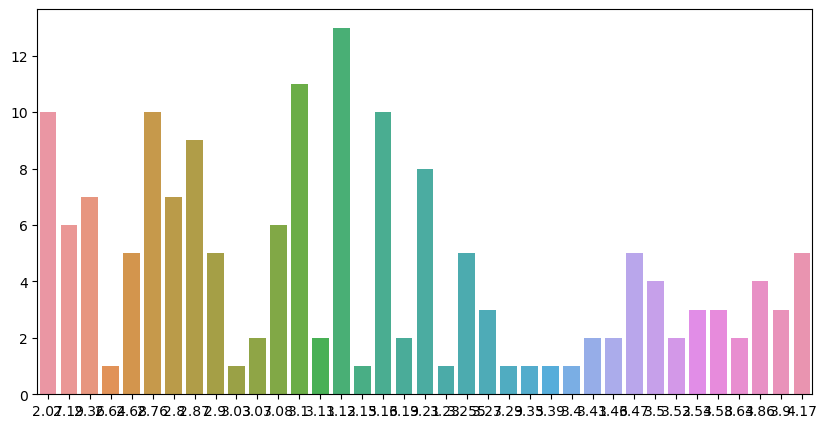

compressionratio


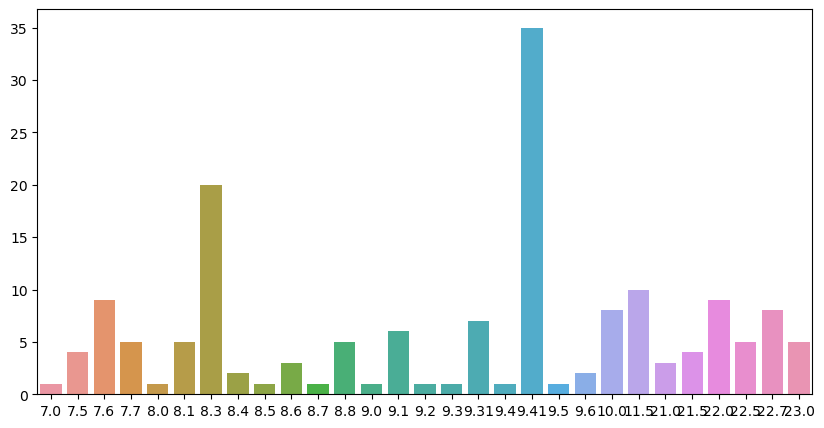

horsepower


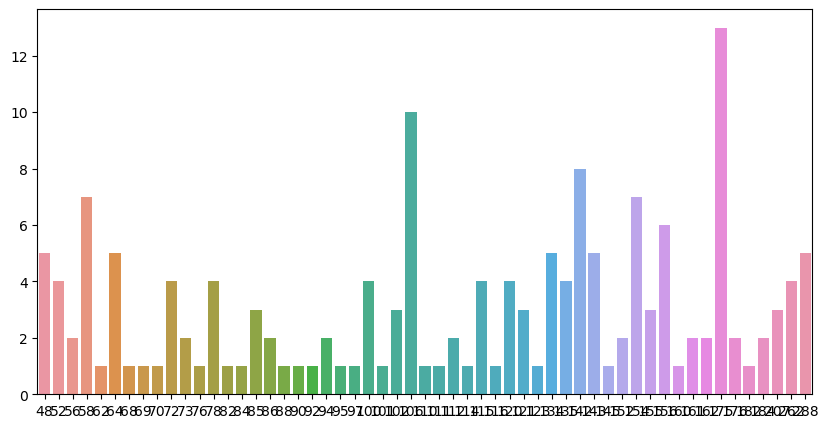

peakrpm


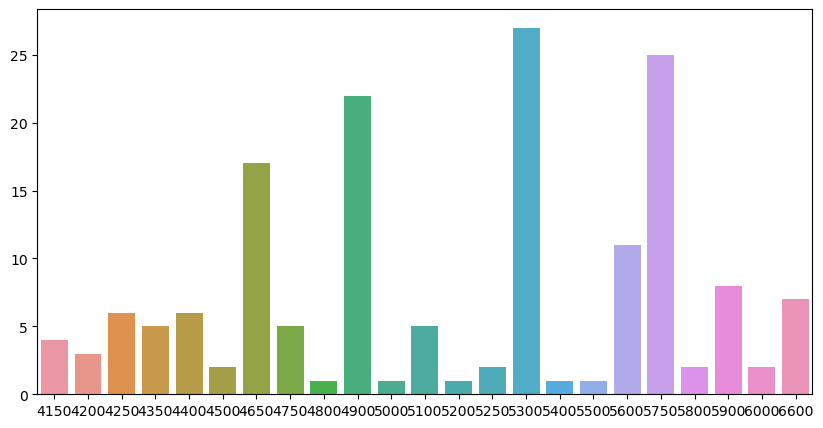

citympg


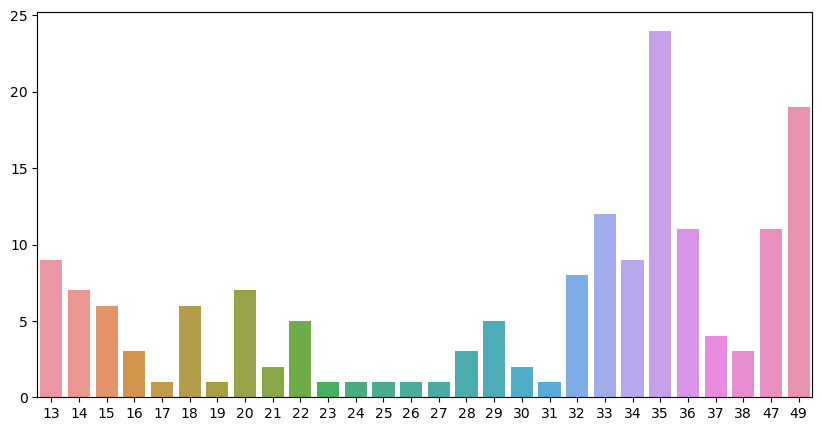

highwaympg


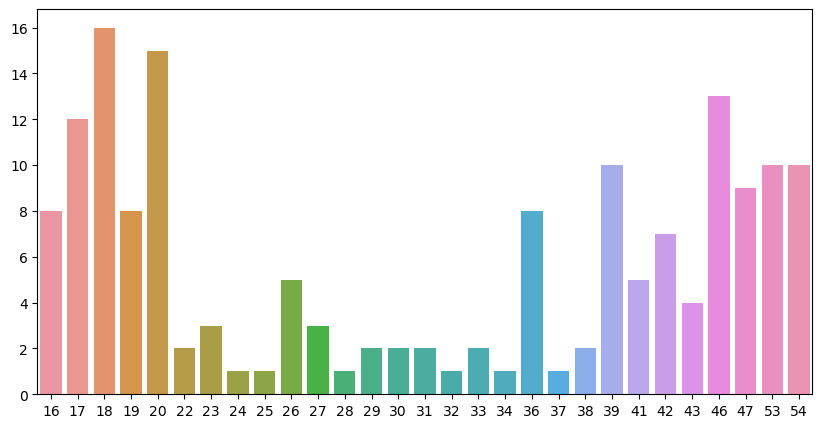

In [89]:
for col in x_train.columns:
    print(col)
    plt.figure(figsize=(10,5))
    a=sns.barplot(data=x_train,x=x_train[col].value_counts().index,y=x_train[col].value_counts().sort_values().values)
    plt.show()

In [17]:
for cols in x_train:
    print(cols," contains :",x_train[cols].nunique()," labels")

symboling  contains : 6  labels
fueltype  contains : 2  labels
aspiration  contains : 2  labels
doornumber  contains : 2  labels
carbody  contains : 5  labels
drivewheel  contains : 3  labels
enginelocation  contains : 2  labels
wheelbase  contains : 49  labels
carlength  contains : 71  labels
carwidth  contains : 42  labels
carheight  contains : 47  labels
curbweight  contains : 139  labels
enginetype  contains : 7  labels
cylindernumber  contains : 7  labels
enginesize  contains : 42  labels
fuelsystem  contains : 8  labels
boreratio  contains : 37  labels
stroke  contains : 37  labels
compressionratio  contains : 29  labels
horsepower  contains : 55  labels
peakrpm  contains : 23  labels
citympg  contains : 28  labels
highwaympg  contains : 29  labels


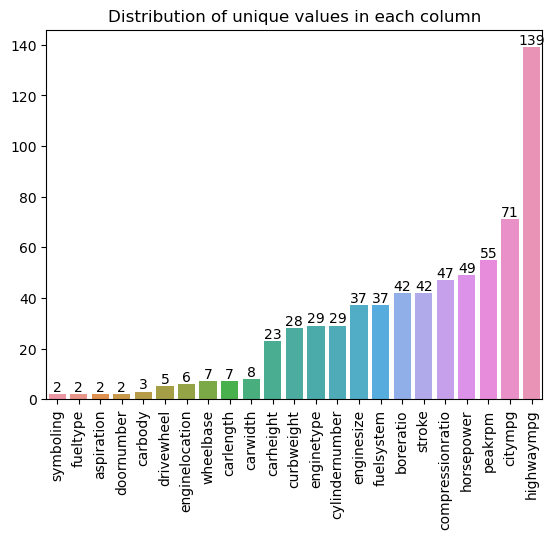

In [79]:
unique_value_counts = x_train.apply(lambda column: column.nunique())
a=sns.barplot(x=unique_value_counts.index,y=unique_value_counts.sort_values().values )
for i in a.containers:
    a.bar_label(i)
plt.title("Distribution of unique values in each column")
plt.xticks(rotation=90)
plt.show()

In [16]:
# seperating the numerical and categorical columns of x_train to perfom transformation using pipeline
numerical_data=x_train.select_dtypes(include=["int64","float64"])
cat_data=x_train.select_dtypes(include=["object"])
ord_data=x_train.select_dtypes(include=["category"])

In [18]:
#Pipeline for numerical columns to perform actions like impute missing values,scaling and transformtion
num_p=Pipeline([("imputing_n",SimpleImputer()),("scaling",StandardScaler())])

In [19]:
cp=Pipeline([("imputing_c",SimpleImputer(strategy="most_frequent")),("Encoder",OneHotEncoder(handle_unknown="ignore"))])


In [20]:
op=Pipeline([("impute_c",SimpleImputer(strategy="most_frequent")),("Encoder1",OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))])

In [21]:
# creating column transformer using pipeline created
ct=ColumnTransformer(transformers=[("numerical",num_p,numerical_data.columns),("nominal",cp,cat_data.columns),
                                   ("ordinal",op,ord_data.columns)],remainder="passthrough")

In [22]:
ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('numerical',
                                 Pipeline(steps=[('imputing_n',
                                                  SimpleImputer()),
                                                 ('scaling',
                                                  StandardScaler())]),
                                 Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')),
                                ('nominal',
                                 Pipeline...
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation',
       'enginetype', 'fuelsystem'],
      dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('impute_c',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('Encoder1',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1))]),
                                 Index(['symboling', 'doornumber', 'cylindernumber'], dtype='object'))])

In [23]:
#Final pipeline
pipeline = Pipeline(steps=[('preprocessor', ct)])

In [24]:
#transform the train data by using column transformer pipeline 
fx_train=ct.fit_transform(x_train)

In [25]:
# transforms the test data           
fx_test=ct.transform(x_test)

In [26]:
#the function takes model, train & test split as an argument
def fit_model_getScores(model,X_train,y_train,X_test,y_test):
    #fit the model with training dataset
    model.fit(X_train,y_train)
    
    #score the training data
    train_score=model.score(X_train,y_train)
    #score the test data
    test_score=model.score(X_test,y_test)
    
    #Display the scores
    print("Scores of {}".format(model),"\n")
    print("Training Score:{:.2f}".format(train_score))
    print("Testing Score:{:.2f}".format(test_score))

In [27]:
linear_model=LinearRegression()

In [28]:
fit_model_getScores(linear_model,fx_train,y_train,fx_test,y_test)

Scores of LinearRegression() 

Training Score:0.92
Testing Score:0.91


In [29]:
def get_metrics(model,X_test,y_test):
    #calculate the predicted value of y 
    y_pred=model.predict(X_test)
    mse=mean_squared_error(y_test,y_pred)#mse
    r2__score=r2_score(y_test,y_pred)#r2_score
    mae=mean_absolute_error(y_test,y_pred)#mae
    rmse=mean_squared_error(y_test,y_pred,squared=False)#rmse
    
    #print the metrics 
    print("The Metrics for {}:".format(model))
    print("----------------------------")
    print("Mean Squared Error:{:.2f}".format(mse))
    print("Root Mean Squared Error:{:.2f}".format(rmse))
    print("Mean Absolute Error:{:.2f}".format(mae))
    print("r2_score:{:.2f}".format(r2__score))

In [30]:
get_metrics(linear_model,fx_test,y_test)

The Metrics for LinearRegression():
----------------------------
Mean Squared Error:4667243.91
Root Mean Squared Error:2160.38
Mean Absolute Error:1704.28
r2_score:0.91


Mean Squared Error (MSE): This measures the average of the squares of the errors or deviations, which are the differences between actual and predicted values. It's calculated by taking the average of the squared differences between the predicted values and the actual values. In this case, it's 4667243.91.

Root Mean Squared Error (RMSE): RMSE is the square root of the MSE. It gives a relatively high weight to large errors due to the squaring effect, and then takes the square root to bring the measurement back to the original scale. In this case, it's 2160.38.

Mean Absolute Error (MAE): Unlike MSE, MAE measures the average absolute errors between the predicted values and the actual values. It is less sensitive to outliers compared to MSE since it doesn't square the errors. In this case, it's 1704.28.

R-squared (r2_score): This is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. It ranges from 0 to 1, where 1 indicates that the model explains all the variability of the response data around its mean. In this case, it's 0.91,
    which means the model explains 91% of the variance in the data.

In [48]:
# Assuming linear_model is your trained Linear Regression model
coefficients = linear_model.coef_

# Assuming fx_train is your feature matrix (NumPy array)
num_columns = fx_train.shape[1]  # Get the number of columns/features

# Printing coefficients for each column using numerical indices
for i in range(num_columns):
    print(f'Coefficient for column {i}: {coefficients[i]}')

Coefficient for column 0: 434.2632817071967
Coefficient for column 1: -635.0946837789733
Coefficient for column 2: 1135.8724125627025
Coefficient for column 3: 702.6031368868726
Coefficient for column 4: 2510.1487052515736
Coefficient for column 5: 6589.636008875138
Coefficient for column 6: -1111.748053568868
Coefficient for column 7: -1425.4787347474426
Coefficient for column 8: -7418.2910203564725
Coefficient for column 9: 45.42239354812986
Coefficient for column 10: 1345.8369819765664
Coefficient for column 11: -120.12931287246263
Coefficient for column 12: 1881.9304704651504
Coefficient for column 13: 7891.35941100364
Coefficient for column 14: -7891.359411003631
Coefficient for column 15: -618.3303793563995
Coefficient for column 16: 618.330379356539
Coefficient for column 17: 2060.9360438287504
Coefficient for column 18: -338.1412665986893
Coefficient for column 19: -944.2352619971917
Coefficient for column 20: 284.1272725589689
Coefficient for column 21: -1062.6867877916975
Coe

In [50]:
# Assuming linear_model is your trained Linear Regression model
coefficients = linear_model.coef_

# Assuming fx_train is your feature matrix (DataFrame)
column_names = x_train.columns

# Creating a dictionary to store coefficients for each column
coefficients_dict = dict(zip(column_names, coefficients))

# Printing coefficients for each column
for column, coef in coefficients_dict.items():
    print(f'{column}: {coef}')

symboling: 434.2632817071967
fueltype: -635.0946837789733
aspiration: 1135.8724125627025
doornumber: 702.6031368868726
carbody: 2510.1487052515736
drivewheel: 6589.636008875138
enginelocation: -1111.748053568868
wheelbase: -1425.4787347474426
carlength: -7418.2910203564725
carwidth: 45.42239354812986
carheight: 1345.8369819765664
curbweight: -120.12931287246263
enginetype: 1881.9304704651504
cylindernumber: 7891.35941100364
enginesize: -7891.359411003631
fuelsystem: -618.3303793563995
boreratio: 618.330379356539
stroke: 2060.9360438287504
compressionratio: -338.1412665986893
horsepower: -944.2352619971917
peakrpm: 284.1272725589689
citympg: -1062.6867877916975
highwaympg: -666.6657413800071


Positive Coefficients: Features with positive coefficients have a positive impact on the target variable. For example:

A higher symboling value is associated with a higher predicted outcome.
drivewheel seems to have the highest positive impact among all features, followed by cylindernumber and carbody.
Negative Coefficients: Features with negative coefficients have a negative impact on the target variable. For example:

A higher fueltype (assuming it's a binary variable) is associated with a lower predicted outcome.
carlength, enginesize, horsepower, and citympg are some of the features with significant negative impacts.
Magnitude of Coefficients: The magnitude of the coefficient indicates the strength of the impact of the corresponding feature on the target variable. Larger magnitudes suggest a stronger impact. For example:

Features like drivewheel, cylindernumber, and stroke have relatively large coefficients, suggesting a stronger impact on the predicted outcome.
Features like carwidth, curbweight, and peakrpm have coefficients with smaller magnitudes compared to others.
Relative Importance: Comparing the magnitudes of coefficients allows you to assess the relative importance of different features in predicting the target variable. Features with larger coefficients are considered more important in the prediction process.

In [ ]:
#Grid Search

In [ ]:
#Ridge model 

In [51]:
ridge_model=Ridge()


In [55]:
params={
    "alpha":[1e-9,1e-6,1e-3,1,100,1000,10000],
    "max_iter":[400,500,600,700]#maximum number of iterations to run
}
g_s_cv=GridSearchCV(ridge_model,params,cv=5)
g_s_cv.fit(fx_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-09, 1e-06, 0.001, 1, 100, 1000, 10000],
                         'max_iter': [400, 500, 600, 700]})

In [56]:
print("Best parameters found: ", g_s_cv.best_params_)
print("Best score: ", g_s_cv.best_score_)

Best parameters found:  {'alpha': 1, 'max_iter': 400}
Best score:  0.8284162281600445


In [59]:
ridge1_model=Ridge(**g_s_cv.best_params_)

In [60]:
fit_model_getScores(ridge1_model,fx_train,y_train,fx_test,y_test)

Scores of Ridge(alpha=1, max_iter=400) 

Training Score:0.91
Testing Score:0.91


In [61]:
get_metrics(ridge1_model,fx_test,y_test)

The Metrics for Ridge(alpha=1, max_iter=400):
----------------------------
Mean Squared Error:4494927.44
Root Mean Squared Error:2120.12
Mean Absolute Error:1624.71
r2_score:0.91


In [62]:
#Lasso

In [63]:
lasso_model=Lasso()

In [64]:
params={
    "alpha":[1e-9,1e-6,1e-3,1,100,1000,10000],
    "max_iter":[400,500,600,700]#maximum number of iterations to run
}
g_s_cv_l=GridSearchCV(lasso_model,params,cv=5)
g_s_cv_l.fit(fx_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-09, 1e-06, 0.001, 1, 100, 1000, 10000],
                         'max_iter': [400, 500, 600, 700]})

In [65]:
print("Best parameters found: ", g_s_cv_l.best_params_)
print("Best score: ", g_s_cv_l.best_score_)

Best parameters found:  {'alpha': 1, 'max_iter': 400}
Best score:  0.8295543202027641


In [66]:
ridge1_model=Ridge(**g_s_cv_l.best_params_)

In [67]:
fit_model_getScores(lasso_model,fx_train,y_train,fx_test,y_test)

Scores of Lasso() 

Training Score:0.92
Testing Score:0.91


In [68]:
get_metrics(lasso_model,fx_test,y_test)

The Metrics for Lasso():
----------------------------
Mean Squared Error:4544820.20
Root Mean Squared Error:2131.86
Mean Absolute Error:1679.30
r2_score:0.91
